Trey's fine imports

In [1]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

NetCDF4 file reading stuffs

In [2]:
#PlaSim output files
##half pulse stuff
file1   = "PLASIMoutputData/gmst_r0hv1_yrmean.nc"
file2   = 'PLASIMoutputData/gmst_r0hv2_yrmean.nc'
file3   = 'PLASIMoutputData/gmst_r0hv3_yrmean.nc'

file_list = [file1, file2, file3]

##Doubling pulse files
dubFile1 = "PLASIMoutputData/gmst_r1x2_yrmean.nc"
dubFile2 = "PLASIMoutputData/gmst_r4x2_yrmean.nc"
dubFile3 = "PLASIMoutputData/gmst_r7x2_yrmean.nc"
dubFileList = [dubFile1, dubFile2, dubFile3]

##Quadrupling pulse files
quadFile1 = "PLASIMoutputData/gmst_r1x4_yrmean.nc"
quadFile2 = "PLASIMoutputData/gmst_r4x4_yrmean.nc"
quadFile3 = "PLASIMoutputData/gmst_r7x4_yrmean.nc"
quadFileList = [quadFile1, quadFile2, quadFile3]


#sizing stuffs
fileListLen = len(file_list)
dubFileListLen = len(dubFileList)
quadFileListLen = len(quadFileList)

##grabbing the size info from a half file to know the number of years
a = nc.Dataset(file1)
b = a.variables['time'][:]
fileLen = len(b)

r = nc.Dataset(dubFile1)
s = r.variables['time'][:]
dubFileLen = len(s)

u = nc.Dataset(quadFile1)
v = u.variables['time'][:]
quadFileLen = len(v)

In [3]:
'''Halving'''

#empty array creation, expecting 3 files in the list
dataRRay = np.zeros((fileLen, 2, fileListLen))

#loop over the datasets to read them into an array. Each file becomes a 2d slice of the 3d array like [year in hrs, dataPt]
for datasetNum in range(len(file_list)):
    #grabbing individual dataset
    set = nc.Dataset(file_list[datasetNum])

    #getting the data into the array, line by line
    for dataPt in range(fileLen):

        #convert the time format from hours to years
        timeInHrs = set.variables['time'][dataPt]
        if timeInHrs/8652 < 1:
            timeInYrs = 0
        else:
            timeInYrs = np.round(timeInHrs/8652)

        #fill years into the 0th array column
        dataRRay[dataPt, 0, datasetNum] = timeInYrs

        #fill in temp data to the 1st col of array
        dataRRay[dataPt, 1, datasetNum] = set.variables['tas'][dataPt]

#subtracted, avg of the ensemble members for later comparison
avgDataArr = np.average(dataRRay, axis=2)
avgDataArr[:,1] -= 285

In [4]:
'''Doubling Pulse PlaSim Dataprocessing'''
'''NEEDS TO BE FUNCTIONALIZED FOR THE QUAD PULSE'''

#empty array creation, expecting 3 files in the list
dubDataArr = np.zeros((dubFileLen, 2, dubFileListLen))

#loop over the datasets to read them into an array. Each file becomes a 2d slice of the 3d array like [year in hrs, dubDataPt]
for datasetNum2 in range(len(dubFileList)):
    #grabbing individual dataset
    set = nc.Dataset(dubFileList[datasetNum2])

    if datasetNum2 == 0:
    
        #getting the data into the array, line by line, skipping line 1
        for dubDataPt in range(1,dubFileLen):
    
            #convert the time format from hours to years
            timeInHrs = set.variables['time'][dubDataPt]
            if timeInHrs/8652 < 1:
                timeInYrs = 0
            else:
                timeInYrs = np.round(timeInHrs/8652)
    
            #fill years into the 0th array column
            dubDataArr[dubDataPt, 0, datasetNum2] = timeInYrs
    
            #fill in temp data to the 1st col of array
            dubDataArr[dubDataPt, 1, datasetNum2] = set.variables['tas'][dubDataPt]

    elif datasetNum2 == 1:
        #getting the data into the array, line by line, skipping the first 4
        for dubDataPt in range(4,dubFileLen):
    
            #convert the time format from hours to years
            timeInHrs = set.variables['time'][dubDataPt]
            if timeInHrs/8652 < 1:
                timeInYrs = 0
            else:
                timeInYrs = np.round(timeInHrs/8652)
    
            #fill years into the 0th array column
            dubDataArr[dubDataPt, 0, datasetNum2] = timeInYrs
    
            #fill in temp data to the 1st col of array
            dubDataArr[dubDataPt, 1, datasetNum2] = set.variables['tas'][dubDataPt]

    elif datasetNum2 == 2:
        #getting the data into the array, line by line, skipping the first seven
        for dubDataPt in range(7,dubFileLen):
    
            #convert the time format from hours to years
            timeInHrs = set.variables['time'][dubDataPt]
            if timeInHrs/8652 < 1:
                timeInYrs = 0
            else:
                timeInYrs = np.round(timeInHrs/8652)
    
            #fill years into the 0th array column
            dubDataArr[dubDataPt, 0, datasetNum2] = timeInYrs
    
            #fill in temp data to the 1st col of array
            dubDataArr[dubDataPt, 1, datasetNum2] = set.variables['tas'][dubDataPt]
            

    else: print("funky dataset read err")

print(np.shape(dubDataArr))

#custom array averager for the fucked up data
##spawnn empty array
dubAvgDataArr = np.zeros((dubFileLen))


##going row by row
for y in range(len(dubDataArr[:,0,0])):
    
    ##Full rows simply get averaged
    if dubDataArr[y,:,:].all() > 0:
        #print(dubDataArr[y,1:,:])
        dubAvgDataArr[y] = np.mean(dubDataArr[y,1:,:])
        
    ##Rows with col 0 and col 1 populated ignore col 2 for averaging
    elif dubDataArr[y,:,1].all()>0 and dubDataArr[y,:,2].all()==0:
        #print(dubDataArr[y,1:,:3])
        dubAvgDataArr[y] = np.mean([dubDataArr[y,1,0], dubDataArr[y,1,1]])

    ##Rows with only col 0 populated just take that value
    elif dubDataArr[y,1,0]>0 and dubDataArr[y,1,1].all()==0 and dubDataArr[y,1,2].all()==0:
        #print(dubDataArr[y,1,0])
        dubAvgDataArr[y] = dubDataArr[y,1,0]

    else:
        print("not a good datapoint")

print(dubAvgDataArr)


#subtracted, avg of the ensemble members for later comparison
dubAvgDataArr[1:] -= 285
dubAvgDataCorrArr = np.array(dubAvgDataArr[1:])
print(dubAvgDataCorrArr)

(27, 2, 3)
not a good datapoint
[  0.         286.20852661 286.17822266 286.05645752 286.1751709
 286.10940552 285.98051453 286.01522827 285.95757039 285.91097005
 285.89542643 285.89559937 285.87671916 285.87026978 285.93930054
 285.87668864 285.85716756 285.84452311 285.88313802 285.85799154
 285.85216268 285.87136841 285.86148071 285.87081909 285.87781779
 285.85535685 285.87567139]
[1.20852661 1.17822266 1.05645752 1.1751709  1.10940552 0.98051453
 1.01522827 0.95757039 0.91097005 0.89542643 0.89559937 0.87671916
 0.87026978 0.93930054 0.87668864 0.85716756 0.84452311 0.88313802
 0.85799154 0.85216268 0.87136841 0.86148071 0.87081909 0.87781779
 0.85535685 0.87567139]


In [5]:
'''Quadrupling Pulse PlaSim Dataprocessing'''

#empty array creation, expecting 3 files in the list
quadDataArr = np.zeros((quadFileLen, 2, quadFileListLen))

#loop over the datasets to read them into an array. Each file becomes a 2d slice of the 3d array like [year in hrs, quadDataPt]
for datasetNum3 in range(len(quadFileList)):
    #grabbing individual dataset
    set = nc.Dataset(quadFileList[datasetNum3])

    if datasetNum3 == 0:
    
        #getting the data into the array, line by line, skipping line 1
        for quadDataPt in range(1,quadFileLen):
    
            #convert the time format from hours to years
            timeInHrs = set.variables['time'][quadDataPt]
            if timeInHrs/8652 < 1:
                timeInYrs = 0
            else:
                timeInYrs = np.round(timeInHrs/8652)
    
            #fill years into the 0th array column
            quadDataArr[quadDataPt, 0, datasetNum3] = timeInYrs
    
            #fill in temp data to the 1st col of array
            quadDataArr[quadDataPt, 1, datasetNum3] = set.variables['tas'][quadDataPt]

    elif datasetNum3 == 1:
        #getting the data into the array, line by line, skipping the first 4
        for quadDataPt in range(4,quadFileLen):
    
            #convert the time format from hours to years
            timeInHrs = set.variables['time'][quadDataPt]
            if timeInHrs/8652 < 1:
                timeInYrs = 0
            else:
                timeInYrs = np.round(timeInHrs/8652)
    
            #fill years into the 0th array column
            quadDataArr[quadDataPt, 0, datasetNum3] = timeInYrs
    
            #fill in temp data to the 1st col of array
            quadDataArr[quadDataPt, 1, datasetNum3] = set.variables['tas'][quadDataPt]

    elif datasetNum3 == 2:
        #getting the data into the array, line by line, skipping the first seven
        for quadDataPt in range(7,quadFileLen):
    
            #convert the time format from hours to years
            timeInHrs = set.variables['time'][quadDataPt]
            if timeInHrs/8652 < 1:
                timeInYrs = 0
            else:
                timeInYrs = np.round(timeInHrs/8652)
    
            #fill years into the 0th array column
            quadDataArr[quadDataPt, 0, datasetNum3] = timeInYrs
    
            #fill in temp data to the 1st col of array
            quadDataArr[quadDataPt, 1, datasetNum3] = set.variables['tas'][quadDataPt]
            

    else: print("funky dataset read err")

print(np.shape(quadDataArr))

#custom array averager for the fucked up data
##spawnn empty array
quadAvgDataArr = np.zeros((quadFileLen))


##going row by row
for y in range(len(quadDataArr[:,0,0])):
    
    ##Full rows simply get averaged
    if quadDataArr[y,:,:].all() > 0:
        #print(quadDataArr[y,1:,:])
        quadAvgDataArr[y] = np.mean(quadDataArr[y,1:,:])
        
    ##Rows with col 0 and col 1 populated ignore col 2 for averaging
    elif quadDataArr[y,:,1].all()>0 and quadDataArr[y,:,2].all()==0:
        #print(quadDataArr[y,1:,:3])
        quadAvgDataArr[y] = np.mean([quadDataArr[y,1,0], quadDataArr[y,1,1]])

    ##Rows with only col 0 populated just take that value
    elif quadDataArr[y,1,0]>0 and quadDataArr[y,1,1].all()==0 and quadDataArr[y,1,2].all()==0:
        #print(quadDataArr[y,1,0])
        quadAvgDataArr[y] = quadDataArr[y,1,0]

    else:
        print("not a good datapoint")

print(quadAvgDataArr)


#subtracted, avg of the ensemble members for later comparison
quadAvgDataArr[1:] -= 285
quadAvgDataCorrArr = np.array(quadAvgDataArr[1:])
print(quadAvgDataCorrArr)

(27, 2, 3)
not a good datapoint
[  0.         286.73474121 286.60211182 286.24026489 286.45465088
 286.2802887  286.07583618 286.26539103 286.1891276  286.05505371
 285.98537191 285.92944336 285.8990682  285.93945312 285.96028646
 285.95479329 285.87769572 285.86101278 285.88530477 285.85809326
 285.90314738 285.89851888 285.87582397 285.88478597 285.84716797
 285.865448   285.87960815]
[1.73474121 1.60211182 1.24026489 1.45465088 1.2802887  1.07583618
 1.26539103 1.1891276  1.05505371 0.98537191 0.92944336 0.8990682
 0.93945312 0.96028646 0.95479329 0.87769572 0.86101278 0.88530477
 0.85809326 0.90314738 0.89851888 0.87582397 0.88478597 0.84716797
 0.865448   0.87960815]


Sanity check plots

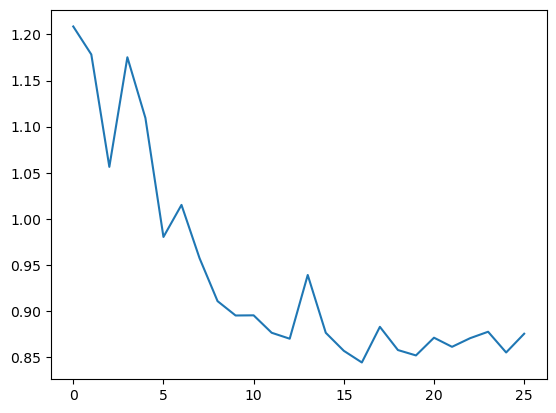

In [6]:
# plt.plot(dataRRay[:,0,0], dataRRay[:,1,0]-285, "or")
# plt.plot(dataRRay[:,0,1], dataRRay[:,1,1]-285, "xg")
# plt.plot(dataRRay[:,0,2], dataRRay[:,1,2]-285, ".b")
# plt.plot(avgDataArr[:,0], avgDataArr[:,1])
# plt.show()

plt.plot(dubAvgDataCorrArr)

Actual 'emulation' calculation stuff

In [48]:
#consts and vars
k = 3.74 #W/m^2 forcing const
t = int(fileLen) #years in half pulse file

#CO2 reference amount
seaOhTwo = 285.8 #ppm

#standard settings !!!
q1 = 0.33 #K/(W/m^2)
q2 = 0.41 #K/(W/m^2)
d1 = 239 #years
d2 = 4.1 #years
paramList = [q1, q2, d1, d2]

#CO2 ref array creation and population, rows: [time, concentration]
co2_0 = np.ones((t, 2), dtype=float)
#set the data to the ref value
co2_0[:,1] *= seaOhTwo
#fix the first year
co2_0[0,0] = 0.0
#fix the rest of the years
for yr in range(1, t):
    co2_0[yr,0] = yr


#CO2 half pulse at t=0 array
co2HF = np.array(co2_0)
co2HF[0,1] = 0.5*seaOhTwo
#so year 0 has half of the CO2 concentration of the other years

#CO2 doubling pulse arr
co2dub = seaOhTwo * np.ones(len(dubAvgDataCorrArr))
co2dub[0] += seaOhTwo

#CO2 quadrupling arr
co2quad = seaOhTwo * np.ones(len(quadAvgDataCorrArr))
co2quad[0] += 3*seaOhTwo

#sudden CO2 doubling at year 19 array
sudDubCO2 = seaOhTwo * np.ones(100)
sudDubCO2[18:] += seaOhTwo


#1% increase per year until 70 years, 30 more years stable
onePerArr = np.zeros(100)
onePerArr[0] = 285
for y in range(1, 71):
    onePerArr[y] = (0.01*onePerArr[y-1]) + onePerArr[y-1]
    
for w in range(71, 100):
    onePerArr[w] = onePerArr[w-1]
    


#Response and rad forcing in one func for the pulse experiments
def WomboCombo(xData, que1, que2, dee1, dee2):

    dee1 = 239
    dee2 = 4.1
    t = len(xData)
    
    #changes to different concentration array cases based on the c arg
    global c
        
    #Clear out summa for next run
    summa = np.zeros(t, dtype=float)

    #clearing out F too
    F = 0.0
    
    #forcing_0
    F = (3.74/np.log(2))*np.log(c[0]/seaOhTwo)
    
    #Calculate the sum
    for i in range(0,t):
        summa[i] = F * ((que1/dee1)*np.exp(-i/dee1)+(que2/dee2)*np.exp(-i/dee2))
            
        #print("sum: " +str(summa[i]))
    return summa


#forcing for other cases
def GMST(xData, que1, que2, dee1, dee2):
    
    t = len(xData)
    
    #changes to different concentration array cases based on the c arg
    global con
        
    #Clear out summa for next run
    summa = np.zeros(t, dtype=float)
    
    #Calculate the sum
    for n in range(0,t):
                    #Forcing                                  #Response
        summa[n] = (3.74/np.log(2))*np.log(con[n]/seaOhTwo) * ((que1/dee1)*np.exp(-n/dee1)+(que2/dee2)*np.exp(-n/dee2))
            
    return summa

#idiot check
#c = co2HF[:,1]
#plt.plot(WomboCombo(avgDataArr[:,0], paramList[0], paramList[1], paramList[2], paramList[3]))

Optimization call and plotting

OG Params: [0.33, 0.41, 239, 4.1]
half pulse updated: [-54.33027256   0.48074846 239.           4.1       ]
double pulse updated: [ 59.59772461   0.33926366 239.           4.1       ]
quad pulse updated: [ 30.50312677   0.43238152 239.           4.1       ]
OG Params again: [0.33, 0.41, 239, 4.1]
double pulse updated: [ 59.59772461   0.33926366 239.           4.1       ]
double pulse updated: [ 59.59772461   0.33926366 239.           4.1       ]


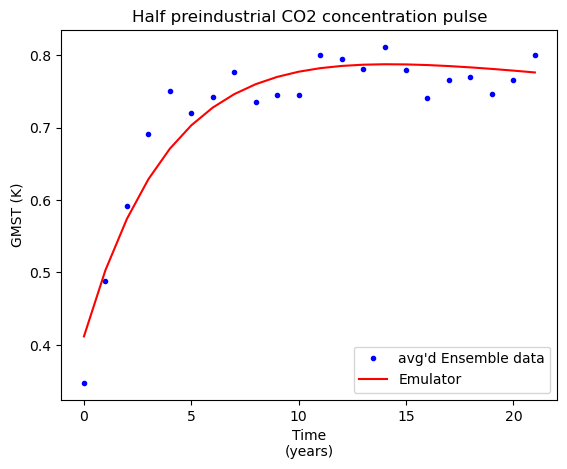

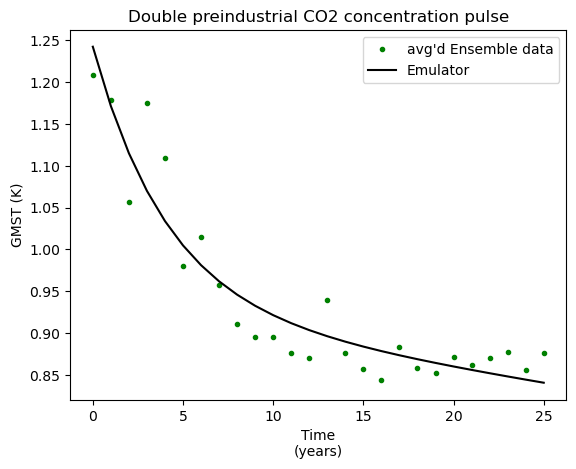

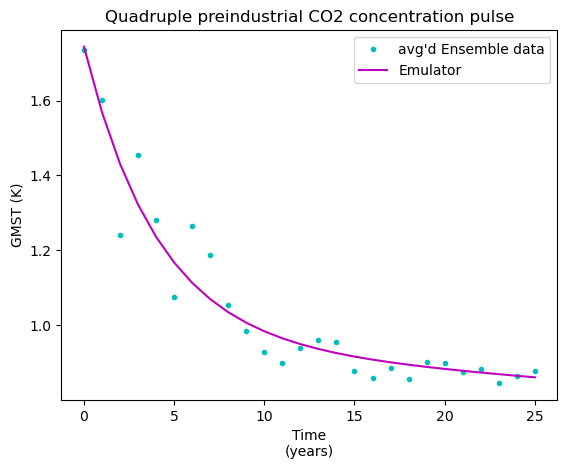

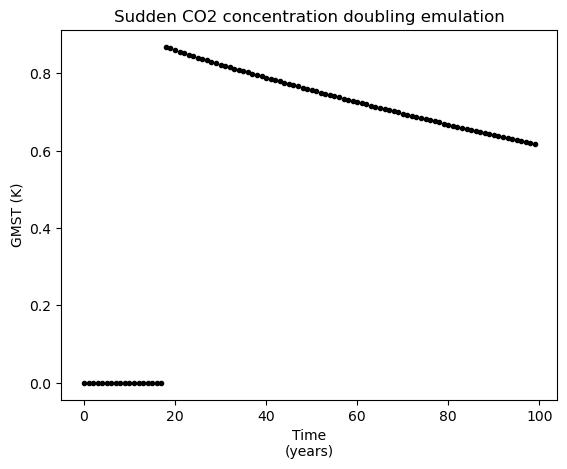

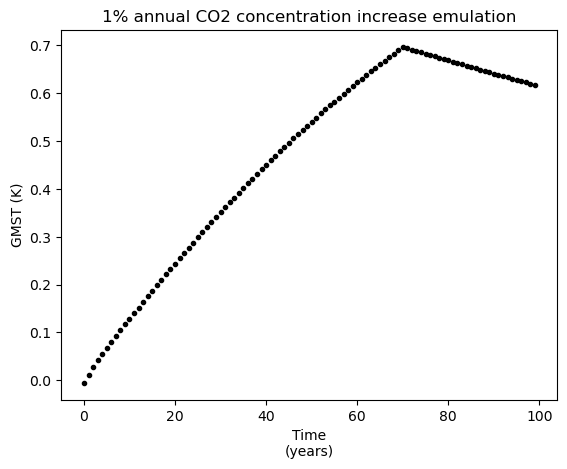

In [61]:
'''Plotting'''

#curve fitting method
mth = 'trf'

#sanity checking that all of the parameters aren't changed
print("OG Params: " + str(paramList))

#halving pulse
plt.figure("Half preindustrial CO2 concentration pulse")
plt.title("Half preindustrial CO2 concentration pulse")
plt.plot(avgDataArr[:,0], avgDataArr[:,1], ".b", label = "avg'd Ensemble data")
c = co2HF[:,1]
optParamsHalf, covarMat = cf(WomboCombo, avgDataArr[:,0], avgDataArr[:,1], p0=paramList, method=mth)
print('half pulse updated: ' + str(optParamsHalf))
plt.plot(avgDataArr[:,0], WomboCombo(avgDataArr[:,0], optParamsHalf[0], optParamsHalf[1], optParamsHalf[2], optParamsHalf[3]), "-r", label="Emulator")
plt.xlabel("Time\n(years)")
plt.ylabel("GMST (K)")
plt.legend()
plt.savefig("Half preindustrial CO2 concentration pulse")

#doubling pulse
plt.figure("Double preindustrial CO2 concentration pulse")
plt.title("Double preindustrial CO2 concentration pulse")
plt.plot(dubAvgDataCorrArr, ".g", label = "avg'd Ensemble data")
c = co2dub
optParamsDub, covarMat = cf(WomboCombo, np.arange(0,len(dubAvgDataCorrArr), 1), dubAvgDataCorrArr, p0=paramList, method=mth)
print("double pulse updated: " + str(optParamsDub))
plt.plot(WomboCombo(dubAvgDataCorrArr, optParamsDub[0], optParamsDub[1], optParamsDub[2], optParamsDub[3]), "-k", label="Emulator")
plt.xlabel("Time\n(years)")
plt.ylabel("GMST (K)")
plt.legend()
plt.savefig("Double preindustrial CO2 concentration pulse")


#quad'ing pulse
plt.figure("Quadruple preindustrial CO2 concentration pulse")
plt.title("Quadruple preindustrial CO2 concentration pulse")
plt.plot(quadAvgDataCorrArr, ".c", label = "avg'd Ensemble data")
c = co2quad
optParamsQuad, covarMat = cf(WomboCombo, np.arange(0,len(quadAvgDataCorrArr), 1), quadAvgDataCorrArr, p0=paramList, method=mth)
print("quad pulse updated: " + str(optParamsQuad))
plt.plot(WomboCombo(quadAvgDataCorrArr, optParamsQuad[0], optParamsQuad[1], optParamsQuad[2], optParamsQuad[3]), "-m", label="Emulator")
plt.xlabel("Time\n(years)")
plt.ylabel("GMST (K)")
plt.legend()
plt.savefig("Quadruple preindustrial CO2 concentration pulse")


#other experiments
#sanity checking that all of the parameters aren't changed
print("OG Params again: " + str(paramList))


##Sudden doubling
plt.figure("Sudden CO2 concentration doubling emulation")
print("double pulse updated: " + str(optParamsDub))
con = sudDubCO2
plt.title("Sudden CO2 concentration doubling emulation")
plt.plot(GMST(np.arange(0,len(sudDubCO2),1), optParamsDub[0], optParamsDub[1], optParamsDub[2], optParamsDub[3]), ".k", label="Emu dub Test")
plt.xlabel("Time\n(years)")
plt.ylabel("GMST (K)")
plt.savefig("Sudden CO2 concentration doubling emulation")

##1%
print("double pulse updated: " + str(optParamsDub))
con = onePerArr
plt.figure("1% annual CO2 concentration increase emulation")
plt.title("1% annual CO2 concentration increase emulation")
plt.plot(GMST(np.arange(0,len(onePerArr),1), optParamsDub[0], optParamsDub[1], optParamsDub[2], optParamsDub[3]), ".k", label="Emu 1% Test")
plt.xlabel("Time\n(years)")
plt.ylabel("GMST (K)")
plt.savefig("1% annual CO2 concentration increase emulation")

In [56]:
#FAIR model ECS and TCR calculation
def Metrics(k, q1, q2, d1, d2):
    d1 = 239
    d2 = 4.1
    
    ECS = k*(q1+q2)
    TCR = k*(q1*(1-(d1/70)*(1-np.exp(-70/d1))) + q2*(1-(d2/70)*(1-np.exp(-70/d2))))
    RWF = TCR/ECS
    return [ECS, TCR, RWF]

knParams = [k]+paramList

print("Default params: " + str(Metrics(knParams[0], knParams[1], knParams[2], knParams[3], knParams[4])))
print("Half pulse [ECS, TCR, RWF]:" + str(Metrics(k, optParamsHalf[0], optParamsHalf[1], optParamsHalf[2], optParamsHalf[3])))
print("Double pulse [ECS, TCR, RWF]:" + str(Metrics(k, optParamsDub[0], optParamsDub[1], optParamsDub[2], optParamsDub[3])))
print("Quad pulse [ECS, TCR, RWF]:" + str(Metrics(k, optParamsQuad[0], optParamsQuad[1], optParamsQuad[2], optParamsQuad[3])))

Default params: [2.7676000000000003, 1.6079015337998113, 0.5809732381123758]
Half pulse [ECS, TCR, RWF]:[-201.39722016174022, -25.35966519539804, 0.12591864562495914]
Double pulse [ECS, TCR, RWF]:[224.1643361415241, 30.86967241621181, 0.1377100075219928]
Quad pulse [ECS, TCR, RWF]:[115.69880102636202, 16.710633127454543, 0.14443220655023917]


Default (lm) fitting method yield:
Half pulse [ECS, TCR, RWF]:[-2021.1034017898653, -26.744052450982664, 0.013232401878745267]
Double pulse [ECS, TCR, RWF]:[160002418.0010371, 30.222958717475354, 1.888906373732393e-07]
Quad pulse [ECS, TCR, RWF]:[-93.46936691533004, 15.615502172664625, -0.16706545350638835]

trf fitting:
Half pulse [ECS, TCR, RWF]:[-2021.0508716472557, -26.744049934903618, 0.013232744563775331]
Double pulse [ECS, TCR, RWF]:[124784413.76187152, 30.22118646625167, 2.4218718953092443e-07]
Quad pulse [ECS, TCR, RWF]:[32538363.280051168, 15.504343100051154, 4.764942528488105e-07]

dogbox failed to fit...



In [52]:
#Traditional ECS and TCR calc
def ECS(gmst):
    # average over the last 30 years
    return np.mean(gmst[-30:])

def TCR(gmst,tidx=np.arange(60,80)):
    # average over the middle 20 years around the time when we reach doubling
    return np.mean(gmst[tidx])

print(ECS(GMST(np.arange(0,len(sudDubCO2),1), optParamsDub[0], optParamsDub[1], optParamsDub[2], optParamsDub[3])))

0.6558421316524541
